<a href="https://colab.research.google.com/github/pwskillsds/PWSkills-Assignments/blob/main/Ensemble_Techniques_And_Its_Types_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown 1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ

Downloading...
From: https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ
To: /content/dataset.csv
100% 11.0k/11.0k [00:00<00:00, 59.4MB/s]


In [3]:
df = pd.read_csv("/content/dataset.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Already the categorical values are encoded in the dataset.

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no missing values

In [7]:
X=df.drop(labels=['target'],axis=1)
y=df['target']

In [8]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [10]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2


In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [12]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42)

In [14]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [15]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

y_test_pred=rf.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred)

print(f" accuaracy : {accuracy} , precision : {precision} , recall : {recall} , f1 : {f1} ")

 accuaracy : 0.8241758241758241 , precision : 0.84 , recall : 0.84 , f1 : 0.8399999999999999 


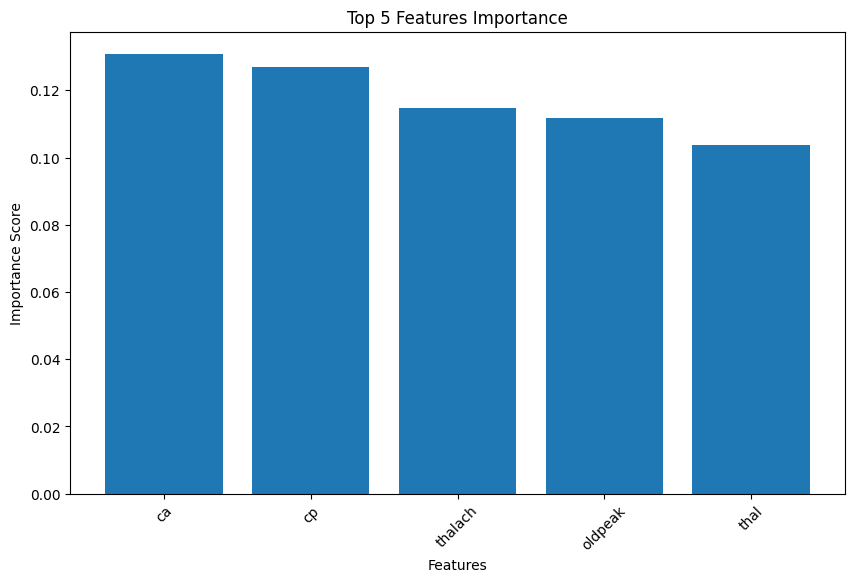

In [17]:
feature_importances = rf.feature_importances_
top_5_features = np.argsort(feature_importances)[::-1][:5]

top_feature_names = X.columns[top_5_features]

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_5_features)), feature_importances[top_5_features], align='center')
plt.xticks(range(len(top_5_features)), top_feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Top 5 Features Importance')
plt.show()

In [18]:
from sklearn.model_selection import RandomizedSearchCV

In [19]:
param_dist = {
    'n_estimators' : [50,100,150],
    'max_depth' : [5,10,15],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,5]
}

In [20]:
cv=RandomizedSearchCV(estimator=rf,param_distributions=param_dist,n_iter=10,cv=5)
cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=10,
                                                    random_state=42),
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]})

In [21]:
best_params=cv.best_params_
best_params

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_depth': 5}

In [22]:
best_clf=RandomForestClassifier(random_state=42,
                                n_estimators=best_params['n_estimators'],
                                max_depth=best_params['max_depth'],
                                min_samples_split=best_params['min_samples_split'],
                                min_samples_leaf=best_params['min_samples_leaf'])


best_clf.fit(X_train,y_train)
y_test_pred=best_clf.predict(X_test)

accuracy = accuracy_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred)

print(f" accuaracy : {accuracy} , precision : {precision} , recall : {recall} , f1 : {f1} ")

 accuaracy : 0.8241758241758241 , precision : 0.8269230769230769 , recall : 0.86 , f1 : 0.8431372549019608 


In [23]:
feature1 = top_feature_names[0]
feature2 = top_feature_names[1]
feature1,feature2

('ca', 'cp')

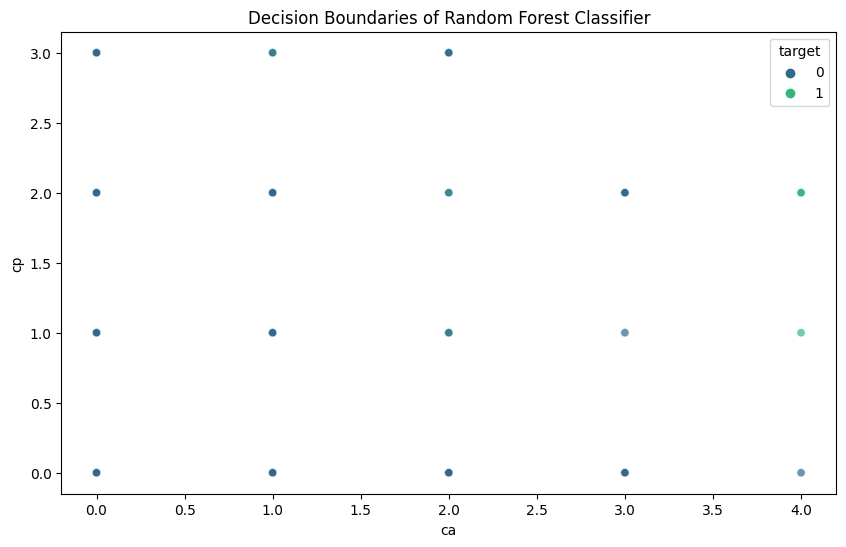

In [24]:

feature1 = top_feature_names[0]
feature2 = top_feature_names[1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=feature1, y=feature2, hue="target", palette="viridis", alpha=0.7)

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Decision Boundaries of Random Forest Classifier")

plt.show()



The insights and limitations of the model for predicting heart disease risk can be analyzed based on the decision boundaries plot. The decision boundaries depict the regions where the model predicts different classes. Here are some observations:

The decision boundaries can help visualize the regions in the feature space where the model predicts a higher or lower risk of heart disease.
The scatter plot shows the actual data points, with different colors representing the two classes (heart disease present or not).
The decision boundaries divide the feature space into regions that correspond to different predictions made by the model.
The model's performance heavily relies on the selected features, as indicated by their importance. The top features used in the plot are considered the most informative for predicting heart disease risk.
The decision boundaries may not always be smooth or simple due to the nature of the random forest algorithm. Random forests can capture complex interactions and non-linear relationships, leading to more intricate decision boundaries.
The model's performance and decision boundaries are based on the data and features available in the provided dataset. The accuracy and generalizability of the model depend on the quality and representativeness of the dataset.
Limitations of the model include the assumption that the provided features are sufficient to accurately predict heart disease risk. It's possible that other unobserved factors could also contribute to the prediction. Additionally, the model's performance may vary depending on the dataset used and the specific population under consideration.